## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [2]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3

EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25
Dropout_EXPS = [0.25,0.3,0.35,0.4,0.45]

In [8]:

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for Dropout_EXP in Dropout_EXPS:
    exp_name_tag = "exp-Dropout_exp-%s" % str(Dropout_EXP)
    print("==",exp_name_tag,"==")
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

== exp-Dropout_exp-0.25 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)         

50000/50000 [==============================] - 2s 44us/step - loss: 1.2969 - acc: 0.5354 - val_loss: 1.3123 - val_acc: 0.5298
Epoch 50/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2900 - acc: 0.5393 - val_loss: 1.3114 - val_acc: 0.5308
== exp-Dropout_exp-0.3 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)          

Epoch 46/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4247 - acc: 0.4885 - val_loss: 1.3765 - val_acc: 0.5023
Epoch 47/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4195 - acc: 0.4930 - val_loss: 1.3662 - val_acc: 0.5148
Epoch 48/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4094 - acc: 0.4945 - val_loss: 1.3636 - val_acc: 0.5123
Epoch 49/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4055 - acc: 0.4976 - val_loss: 1.3621 - val_acc: 0.5096
Epoch 50/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4049 - acc: 0.4987 - val_loss: 1.3621 - val_acc: 0.5104
== exp-Dropout_exp-0.4 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense

Epoch 45/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4881 - acc: 0.4680 - val_loss: 1.4027 - val_acc: 0.5013
Epoch 46/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4852 - acc: 0.4678 - val_loss: 1.4042 - val_acc: 0.4941
Epoch 47/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4844 - acc: 0.4698 - val_loss: 1.4061 - val_acc: 0.4932
Epoch 48/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4727 - acc: 0.4738 - val_loss: 1.3932 - val_acc: 0.5035
Epoch 49/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4662 - acc: 0.4743 - val_loss: 1.3961 - val_acc: 0.5022
Epoch 50/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4643 - acc: 0.4786 - val_loss: 1.3957 - val_acc: 0.4983
== exp-Dropout_exp-0.45 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (Inpu

Epoch 44/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5533 - acc: 0.4447 - val_loss: 1.4424 - val_acc: 0.4857
Epoch 45/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5496 - acc: 0.4442 - val_loss: 1.4405 - val_acc: 0.4870
Epoch 46/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5345 - acc: 0.4517 - val_loss: 1.4430 - val_acc: 0.4843
Epoch 47/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5363 - acc: 0.4503 - val_loss: 1.4285 - val_acc: 0.4904
Epoch 48/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5268 - acc: 0.4523 - val_loss: 1.4348 - val_acc: 0.4893
Epoch 49/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5258 - acc: 0.4517 - val_loss: 1.4189 - val_acc: 0.4987
Epoch 50/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5146 - acc: 0.4568 - val_loss: 1.4295 - val_acc: 0.4909


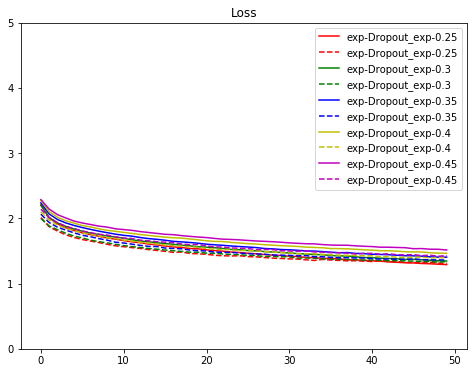

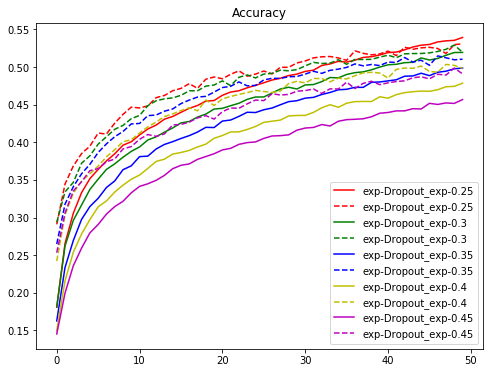

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


In [11]:
LEARNING_RATE = 1e-3

EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25
Dropout_EXPS = [0.15,0.2,0.25,0.3]

In [12]:
results_adam = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
print("optimizer=Adam")
for Dropout_EXP in Dropout_EXPS:
    exp_name_tag = "exp-Dropout_exp-%s" % str(Dropout_EXP)
    print("==",exp_name_tag,"==")
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    
    results_adam[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

optimizer=Adam
== exp-Dropout_exp-0.15 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None

Epoch 48/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4189 - acc: 0.4897 - val_loss: 1.4134 - val_acc: 0.4960
Epoch 49/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4167 - acc: 0.4922 - val_loss: 1.4068 - val_acc: 0.4998
Epoch 50/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4148 - acc: 0.4927 - val_loss: 1.4376 - val_acc: 0.4814
== exp-Dropout_exp-0.25 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (N

Epoch 47/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4915 - acc: 0.4636 - val_loss: 1.4523 - val_acc: 0.4919
Epoch 48/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4927 - acc: 0.4603 - val_loss: 1.4558 - val_acc: 0.4845
Epoch 49/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4860 - acc: 0.4649 - val_loss: 1.4504 - val_acc: 0.4873
Epoch 50/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4892 - acc: 0.4661 - val_loss: 1.4742 - val_acc: 0.4750
== exp-Dropout_exp-0.3 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_25 (Dropout)      

Epoch 46/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5579 - acc: 0.4355 - val_loss: 1.5136 - val_acc: 0.4731
Epoch 47/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5622 - acc: 0.4365 - val_loss: 1.5012 - val_acc: 0.4674
Epoch 48/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5579 - acc: 0.4377 - val_loss: 1.5121 - val_acc: 0.4657
Epoch 49/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5490 - acc: 0.4394 - val_loss: 1.5370 - val_acc: 0.4636
Epoch 50/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5619 - acc: 0.4375 - val_loss: 1.5117 - val_acc: 0.4686


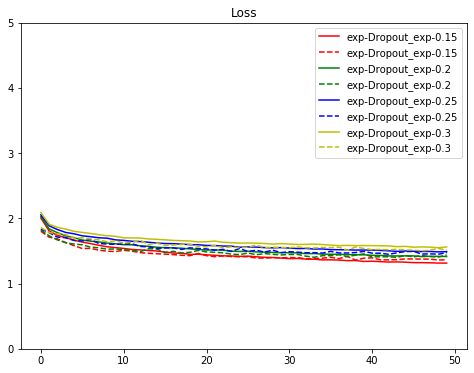

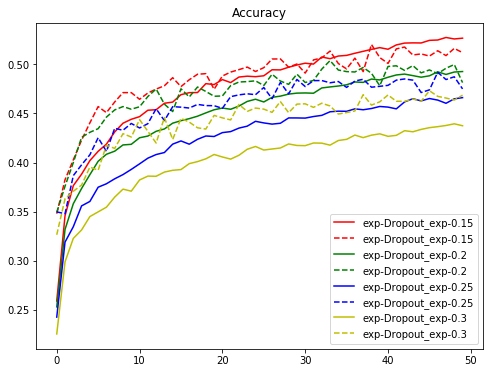

In [13]:

import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_adam.keys()):
    plt.plot(range(len(results_adam[cond]['train-loss'])),results_adam[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_adam[cond]['valid-loss'])),results_adam[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_adam.keys()):
    plt.plot(range(len(results_adam[cond]['train-acc'])),results_adam[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_adam[cond]['valid-acc'])),results_adam[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()